# 18BCE080 - Implement K-Means Algorithm to cluster the given points into three clusters.

##Importing required libraries

In [16]:
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import itertools
import sys
plt.style.use('seaborn')

## Adding the data points

In [17]:
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [24]:
num_points = 8
data_points = []
data_points.append(point(2, 10))
data_points.append(point(2, 5))
data_points.append(point(8, 4))
data_points.append(point(5, 8))
data_points.append(point(7, 5))
data_points.append(point(6, 4))
data_points.append(point(1, 2))
data_points.append(point(4, 9))


print("Number of points: ", num_points)
print("Points: ")
for i in data_points:
    print("({}, {})".format(i.x, i.y))

Number of points:  8
Points: 
(2, 10)
(2, 5)
(8, 4)
(5, 8)
(7, 5)
(6, 4)
(1, 2)
(4, 9)


## Visualizing data points

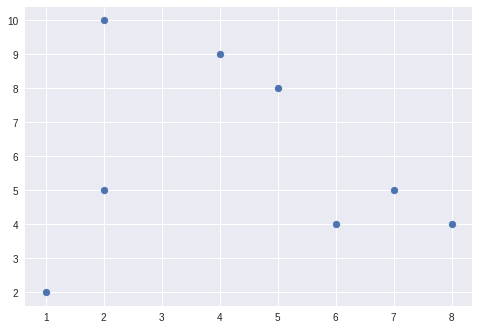

In [26]:
xa = []
ya = []

for i in data_points:
    xa.append(i.x)
    ya.append(i.y)

plt.scatter(xa, ya)

d = []
for i in range(num_points):
    d.append([xa[i], ya[i]])

## Finding value of K using elbow method

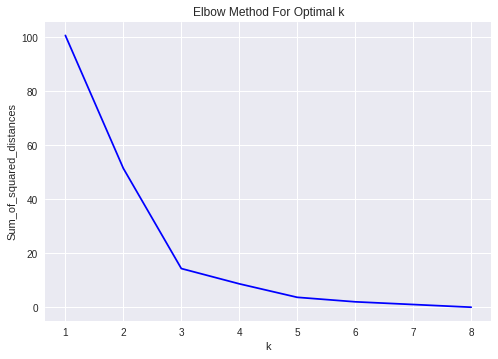

In [27]:
Sum_of_squared_distances = []

for k in range(1, num_points + 1):
    km = KMeans(n_clusters=k)
    km = km.fit(d)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(range(1, num_points + 1), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Assigning initial cluster centers

In [28]:

centers = [data_points[0], data_points[3], data_points[6]]
num_clusters = 3

clusters = {}
for i in range(num_clusters):
    clusters[i] = [centers[i]]
    print("Cluster {} has center ({}, {})".format(i, centers[i].x, centers[i].y))

Cluster 0 has center (2, 10)
Cluster 1 has center (5, 8)
Cluster 2 has center (1, 2)


## Defining various distance metrics

In [29]:
def euclidean_dist(pointa, pointb):
    dist_x = (pointa.x - pointb.x) ** 2
    dist_y = (pointa.y - pointb.y) ** 2
    return (dist_x + dist_y) ** 0.5


def manhattan_dist(pointa, pointb):
    dist_x = abs(pointa.x - pointb.x)
    dist_y = abs(pointa.y - pointb.y)
    return (dist_x + dist_y)


def supremum_dist(pointa, pointb):
    dist_x = abs(pointa.x - pointb.x)
    dist_y = abs(pointa.y - pointb.y)
    if dist_y > dist_x:
        return dist_y
    else:
        return dist_x


def new_center(cluster):
    nx, ny = 0, 0
    for i in cluster:
        nx += i.x
        ny += i.y
    a = point(nx / len(cluster), ny / len(cluster))
    return a

## Performing K-Means for 2 iterations

In [30]:
dist_choice = int(input("Select : \n1.Euclidean Distance\n2.Manhattan Distance\n3.supremum Distance\n"))
if dist_choice == 1:
    dist_choice = "euclidean_dist"
elif dist_choice == 2:
    dist_choice = "manhattan_dist"
elif dist_choice == 3:
    dist_choice = "supremum_dist"

for j in range(1, 3):
    print("\n\n\t\t\tIteration {}\n\n".format(j))
    
    for i in data_points:
        print("-"*50)
        print("Point being considered is : ({}, {})".format(i.x, i.y))
        e_dists = []
        
        [e_dists.append(eval(dist_choice + "(i, centers[iter1])")) for iter1 in range(num_clusters)]
        
        minpos = e_dists.index(min(e_dists))
        print("The point is assigned to cluster {}".format(minpos))
        
        for iter2 in range(num_clusters):
            if iter2 == minpos:
                if i not in clusters[iter2]:
                    clusters[minpos].append(i)
            elif i in clusters[iter2]:
                clusters[iter2].remove(i)
                
        for iter3 in range(num_clusters):
            centers[iter3] = new_center(clusters[iter3])
        print("The clusters have now become : ")
        
        for key, val in clusters.items():
            print("Cluster ", key)
            print("Points : ")
            for i in val:
                print("({}, {})".format(i.x, i.y))
            print("Center : ({}, {})\n".format(centers[key].x, centers[key].y))

Select : 
1.Euclidean Distance
2.Manhattan Distance
3.supremum Distance
1


			Iteration 1


--------------------------------------------------
Point being considered is : (2, 10)
The point is assigned to cluster 0
The clusters have now become : 
Cluster  0
Points : 
(2, 10)
Center : (2.0, 10.0)

Cluster  1
Points : 
(5, 8)
Center : (5.0, 8.0)

Cluster  2
Points : 
(1, 2)
Center : (1.0, 2.0)

--------------------------------------------------
Point being considered is : (2, 5)
The point is assigned to cluster 2
The clusters have now become : 
Cluster  0
Points : 
(2, 10)
Center : (2.0, 10.0)

Cluster  1
Points : 
(5, 8)
Center : (5.0, 8.0)

Cluster  2
Points : 
(1, 2)
(2, 5)
Center : (1.5, 3.5)

--------------------------------------------------
Point being considered is : (8, 4)
The point is assigned to cluster 1
The clusters have now become : 
Cluster  0
Points : 
(2, 10)
Center : (2.0, 10.0)

Cluster  1
Points : 
(5, 8)
(8, 4)
Center : (6.5, 6.0)

Cluster  2
Points : 
(1, 2)
(2, 5)


## Visualizing final clusters

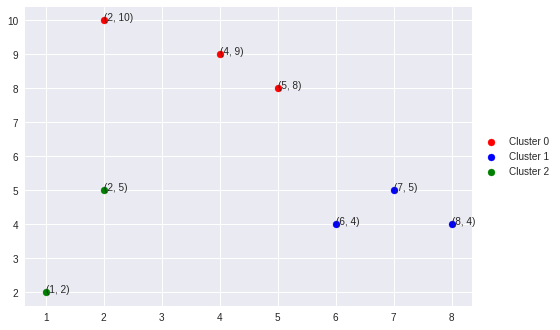

Final Centers : 
Cluster 0 : (3.6666666666666665, 9.0)
Cluster 1 : (7.0, 4.333333333333333)
Cluster 2 : (1.5, 3.5)


In [31]:
def fetch_xy(i):
    x, y = [], []
    for a in clusters[i]:
        x.append(a.x)
        y.append(a.y)
    return x, y


colors = itertools.cycle(['r', 'b', 'g', 'y', 'c', 'm', 'k'])
for i in range(num_clusters):
    x, y = fetch_xy(i)
    c = next(colors)
    plt.scatter(x, y, c=c, label='Cluster {}'.format(i))
    plt.plot(centers[i].x, centers[i].y, marker='x', c=c)

for i in range(num_points):
    plt.annotate('({}, {})'.format(xa[i], ya[i]), xy=(xa[i], ya[i]))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

print("Final Centers : ")
for i in range(num_clusters):
    print("Cluster {} : ({}, {})".format(i, centers[i].x, centers[i].y))

In [ ]:
import pdfcrowd

api = pdfcrowd.HtmlToPdfClient("demo", "ce544b6ea52a5621fb9d55f8b542d14d")
api.convertUrlToFile('https://example.com', 'example.pdf')